- What type of restaurant do the majority of customers order from?

- How many votes has each type of restaurant received from customers?

- What are the ratings that the majority of restaurants have received?

- Zomato has observed that most couples order most of their food online. What is their average spending on each order?

- Which mode (Online or Offline) has received the maximum rating?

- Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?


In [3]:
# Libraries import

import pandas as pd # data manipulation and analysis
import numpy as np  # Numerical Operations
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization


In [4]:
zom = pd.read_csv('/content/dataset_zomato.csv')
zom.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


#### DataCleaning

In [5]:
# convert the datatype of column - 'rate' i.e we don't want that 4.5/5 instead we want only 4.5
def handleRate(value):
  try:
    value = str(value).split('/')
    value = value[0]
    return float(value)
  except:
    return np.nan

zom['rate'] = zom['rate'].apply(handleRate)
print(zom.head(5))

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


###Question 1 - Type of restaurant

Text(0.5, 0, 'type of restaurant')

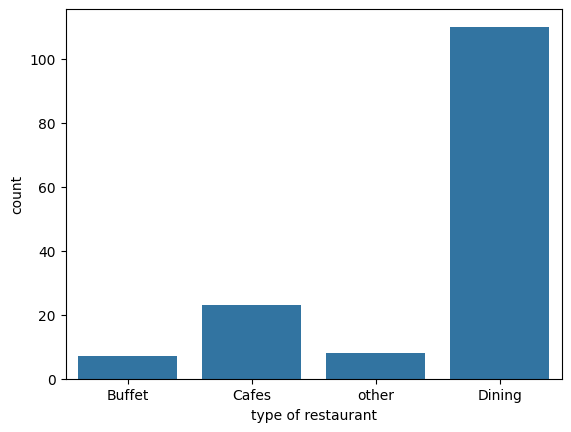

In [7]:
sns.countplot(x=zom['listed_in(type)'])
plt.xlabel('type of restaurant')

### How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

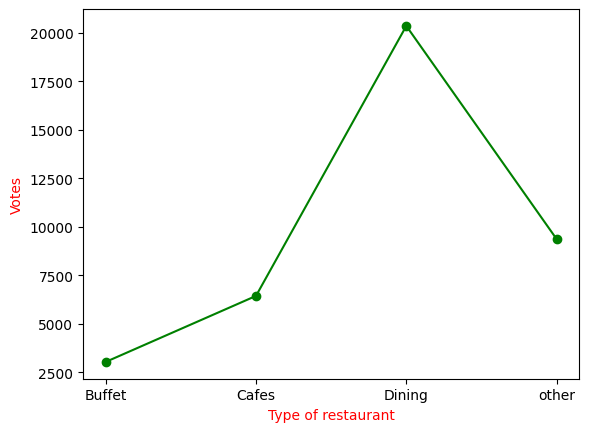

In [8]:
grouped_data = zom.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green',marker='o')
plt.xlabel('Type of restaurant',c='red',size=10)
plt.ylabel('Votes',c='red',size=10)

### What are the ratings that the majority of restaurants have received?

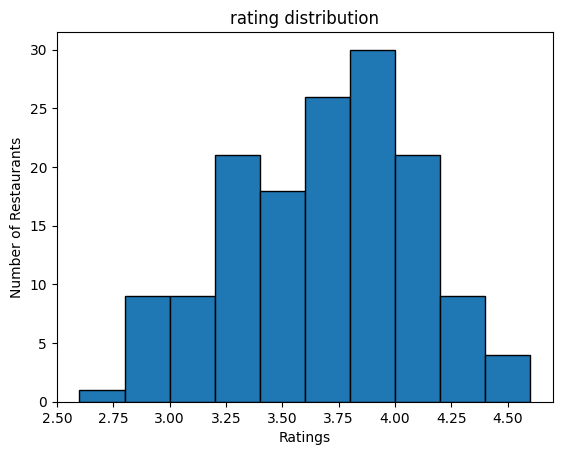

In [13]:
plt.hist(zom['rate'],bins=10,edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Number of Restaurants')
plt.title('rating distribution')
plt.show()

###Zomato has observed that most couples order most of their food online. What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

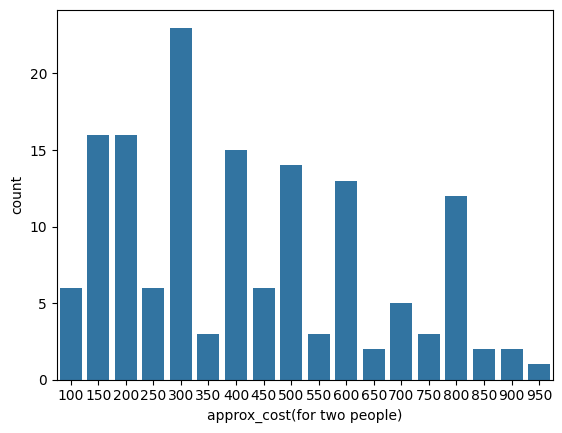

In [16]:
# two people = couple
twice_people = zom['approx_cost(for two people)']
sns.countplot(x=twice_people)

### Which mode (Online or Offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

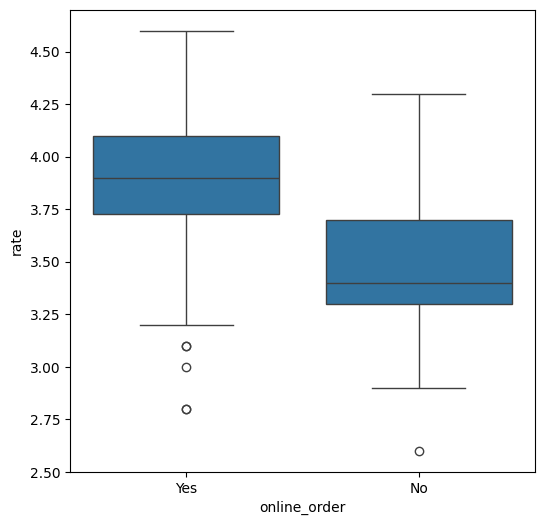

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order',y='rate',data=zom)


### Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

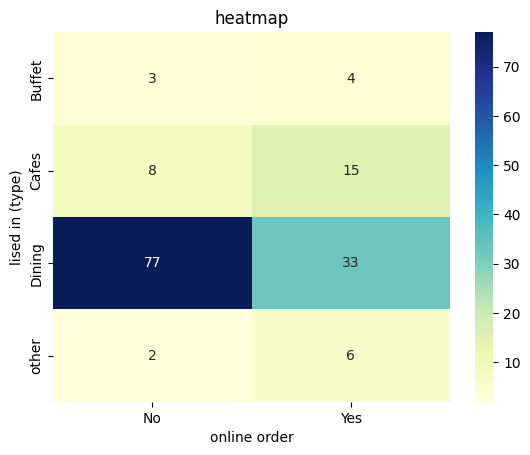

In [22]:
pivot_table = zom.pivot_table(index = 'listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('heatmap')
plt.xlabel('online order')
plt.ylabel('lised in (type)')
plt.show()